<b><font color="SteelBlue" size="+3">Anticipez les besoins en consommation de bâtiments <br>
Prediction EnergyUse</font></b>

Ce notebook est la suite du notebook d'exploration des données Deveau_Estelle_1_notebook_exploratoire_022024

# Introduction

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
import time
from scipy.stats import uniform
from sklearn.inspection import permutation_importance
from scipy.stats import uniform, loguniform

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_exploratoire_022024.ipynb',
 'Deveau_Estelle_2_notebook_prediction_EnergyUse_022024.ipynb',
 'Deveau_Estelle_3_notebook_prediction_GHGEmissions_022024.ipynb',
 'Map_of_Seattle,_divided_by_districts.png',
 'svg']

In [3]:
os.listdir("data/cleaned/")

['df_cleaned.csv']

In [4]:
path     = "./data/cleaned/"
filename = "df_cleaned.csv"

In [5]:
df = pd.read_csv(path + filename)
df.head()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,...,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire,Log_TotalGHGEmissions,Log_SiteEnergyUseWN
0,1.0,12,0,60.0,7456910.0,249.98,89,1,26.872820,52.917723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.521381,15.824652
1,1.0,11,15064,61.0,8664479.0,295.86,20,3,0.000000,37.426959,...,0.0,0.0,0.0,0.0,4622.0,15064.0,0.0,0.0,5.689886,15.974742
2,1.0,41,196718,43.0,73937112.0,2089.28,47,1,29.168781,66.984851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.644575,18.118725
3,1.0,10,0,56.0,6946800.5,286.43,90,1,31.877211,39.858983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.657494,15.753792
4,1.0,11,0,27.0,6062767.5,176.14,90,1,0.000000,46.368511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.171279,15.617677


In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(1121, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberofBuildings         1121 non-null   float64
 1   NumberofFloors            1121 non-null   int64  
 2   PropertyGFAParking        1121 non-null   int64  
 3   ENERGYSTARScore           720 non-null    float64
 4   SiteEnergyUseWN(kBtu)     1121 non-null   float64
 5   TotalGHGEmissions         1121 non-null   float64
 6   BuildingAge               1121 non-null   int64  
 7   NumberOfPropertyUseTypes  1121 non-null   int64  
 8   SteamUse_pct              1121 non-null   float64
 9   Electricity_pct           1121 non-null   float64
 10  NaturalGas_pct            1121 non-null   float64
 11  GFA_Residence             1121 non-null   float64
 12  GFA_Loisir                1121 non-null   float64
 13  GFA_Commerce              1121 non-null   float64
 14  GFA_Serv

In [9]:
df.describe()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire,Log_TotalGHGEmissions,Log_SiteEnergyUseWN
count,1121.000000,1121.000000,1121.000000,720.000000,1.121000e+03,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1.121000e+03,1121.000000,1121.000000,1121.000000,1.121000e+03,1121.000000,1121.000000,1121.000000,1.121000e+03,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,1.139161,3.867083,6819.468332,62.341667,6.390161e+06,133.270116,57.398751,1.851918,1.809708,66.055868,26.899061,7247.523640,3.646062e+03,7827.536307,919.989295,8878.849688,4.579638e+03,8482.091526,2617.057092,11994.209634,2.506233e+04,1585.329170,2898.891169,2103.228368,8677.375558,1410.524532,954.171276,3.857590,14.848536
std,1.292938,6.143754,28894.532907,28.614360,1.166456e+07,296.673597,31.980976,1.176943,8.185927,26.858329,23.828618,43154.050672,5.942534e+04,36641.908052,16561.867910,40257.938734,6.143666e+04,19577.052650,19024.873035,31187.363322,1.167244e+05,23965.936305,21006.010351,18254.316342,33564.975611,8400.148391,10586.333233,1.463367,1.232689
min,1.000000,1.000000,0.000000,1.000000,5.811420e+04,0.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.916291,10.970165
25%,1.000000,1.000000,0.000000,43.000000,1.213910e+06,19.070000,33.000000,1.000000,0.000000,44.308984,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.948116,14.009357
50%,1.000000,2.000000,0.000000,69.000000,2.447326e+06,46.260000,54.000000,1.000000,0.000000,65.086278,26.072621,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.834278,14.710506
75%,1.000000,4.000000,0.000000,86.250000,6.345882e+06,127.290000,88.000000,2.000000,0.000000,94.843060,46.663515,0.000000,0.000000e+00,0.000000,0.000000,1593.000000,0.000000e+00,7032.000000,0.000000,6792.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.846468,15.663317
max,27.000000,76.000000,327680.000000,100.000000,1.371061e+08,3995.450000,116.000000,9.000000,64.773098,100.000000,97.077764,756493.000000,1.585960e+06,561684.000000,537150.000000,646556.000000,1.719643e+06,332343.000000,367884.000000,371731.000000,1.680937e+06,726000.000000,303910.000000,564258.000000,438756.000000,121087.000000,181930.000000,8.292911,18.736266


Dans un premier temps, nous allons travailler en excluant l'ENERGYSTARScore puis nous ferons une comparaison avec son utilisation.

# Modelisation sans l'Energy Star Score

## Importance des features

### Data preparation

In [10]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df['Log_TotalGHGEmissions']

In [11]:
features.head(1)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
0,1.0,12,0,89,1,26.87282,52.917723,17.11772,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Séparation des données

In [12]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((896, 24), (225, 24))

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 355 to 860
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberofBuildings         896 non-null    float64
 1   NumberofFloors            896 non-null    int64  
 2   PropertyGFAParking        896 non-null    int64  
 3   BuildingAge               896 non-null    int64  
 4   NumberOfPropertyUseTypes  896 non-null    int64  
 5   SteamUse_pct              896 non-null    float64
 6   Electricity_pct           896 non-null    float64
 7   NaturalGas_pct            896 non-null    float64
 8   GFA_Residence             896 non-null    float64
 9   GFA_Loisir                896 non-null    float64
 10  GFA_Commerce              896 non-null    float64
 11  GFA_Services_public       896 non-null    float64
 12  GFA_Autres                896 non-null    float64
 13  GFA_Education_sup         896 non-null    float64
 14  GFA_Bureau   

In [14]:
X_train.head()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
355,1.0,2,0,64,4,0.0,43.086418,48.773113,0.0,0.0,4270.0,0.0,1578.0,0.0,8068.0,0.0,101752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,1.0,5,112980,13,1,0.0,99.999990,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177748.0,0.0,0.0,0.0,0.0
388,1.0,3,48510,56,1,0.0,99.504949,0.495051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65434.0,0.0,0.0,0.0,0.0,0.0,0.0
529,1.0,2,0,97,1,0.0,54.348878,37.840169,0.0,0.0,0.0,0.0,1925.0,0.0,23995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,1.0,3,0,95,2,0.0,100.000000,0.000000,4540.0,25096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y_train.head()

355    4.711600
371    4.238445
388    4.857717
529    3.839022
464    1.568616
Name: Log_TotalGHGEmissions, dtype: float64

### Standardisation

In [16]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [17]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
355,-0.088342,-0.304108,-0.232516,0.204044,1.925052,-0.233118,-0.866297,0.940109,-0.160449,-0.054826,-0.103264,-0.051557,-0.173501,-0.066757,-0.028011,-0.127781,2.936976,-0.216667,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091
371,-0.088342,0.229819,3.894073,-1.415267,-0.731282,-0.233118,1.261375,-1.117861,-0.160449,-0.054826,-0.219656,-0.051557,-0.210883,-0.066757,-0.423316,-0.127781,-0.408377,-0.216667,-0.074064,10.082127,-0.101174,-0.258525,-0.180387,-0.09091
388,-0.088342,-0.126132,1.539310,-0.049966,-0.731282,-0.233118,1.242868,-1.096973,-0.160449,-0.054826,-0.219656,-0.051557,-0.210883,-0.066757,-0.423316,-0.127781,-0.408377,0.438445,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091
529,-0.088342,-0.304108,-0.232516,1.251833,-0.731282,-0.233118,-0.445259,0.478796,-0.160449,-0.054826,-0.219656,-0.051557,-0.165281,-0.066757,0.752358,-0.127781,-0.408377,-0.216667,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091
464,-0.088342,-0.126132,-0.232516,1.188331,0.154162,-0.233118,1.261376,-1.117861,-0.058492,0.413120,-0.219656,-0.051557,-0.210883,-0.066757,-0.423316,-0.127781,-0.408377,-0.216667,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091


### Test de Student

In [20]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.709
Model:                               OLS   Adj. R-squared:                  0.701
Method:                    Least Squares   F-statistic:                     88.63
Date:                   Mon, 26 Feb 2024   Prob (F-statistic):          1.19e-214
Time:                           19:53:20   Log-Likelihood:                -1067.7
No. Observations:                    896   AIC:                             2185.
Df Residuals:                        871   BIC:                             2305.
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [21]:
# Suppression du NumberofFloors
X_train_scaled_df.drop(columns=['PropertyGFAParking'], inplace=True)

In [22]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.709
Model:                               OLS   Adj. R-squared:                  0.702
Method:                    Least Squares   F-statistic:                     92.57
Date:                   Mon, 26 Feb 2024   Prob (F-statistic):          1.26e-215
Time:                           19:53:23   Log-Likelihood:                -1067.7
No. Observations:                    896   AIC:                             2183.
Df Residuals:                        872   BIC:                             2299.
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

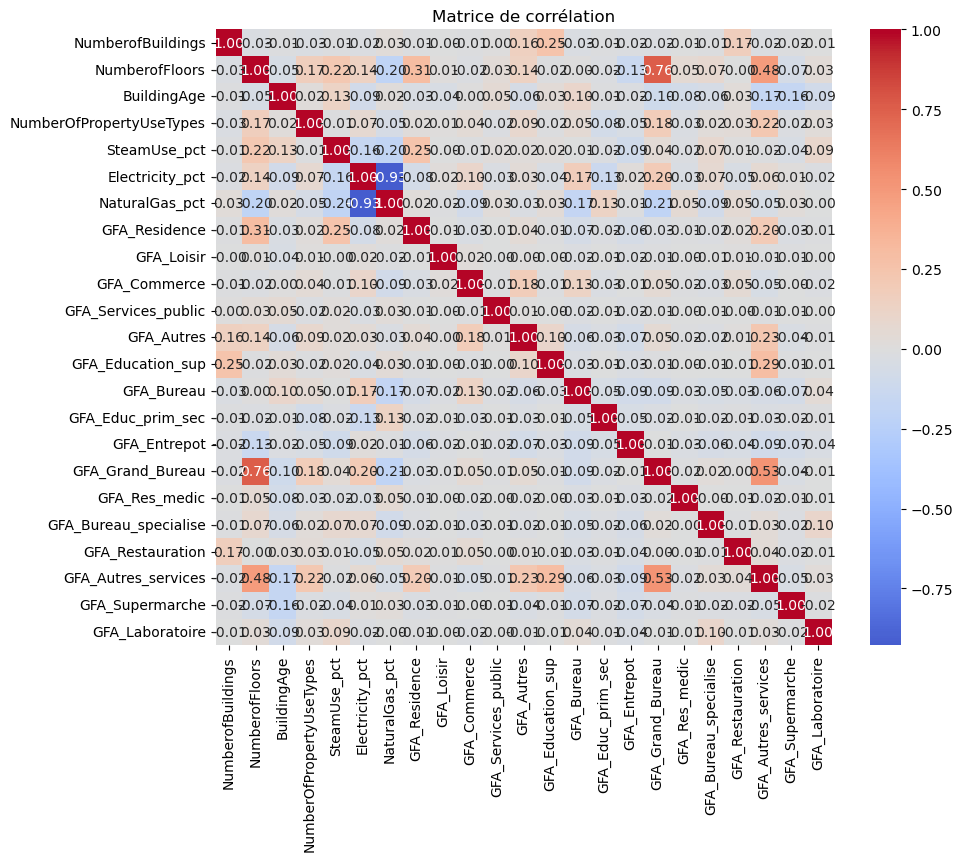

In [23]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## Tests de modèles

### Data preparation

In [24]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore', 
                    'PropertyGFAParking'], axis=1)
target = df['Log_TotalGHGEmissions']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [25]:
features.head(1)

,NumberofBuildings,NumberofFloors,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
0,1.0,12,89,1,26.87282,52.917723,17.11772,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((896, 23), (225, 23))

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 355 to 860
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberofBuildings         896 non-null    float64
 1   NumberofFloors            896 non-null    int64  
 2   BuildingAge               896 non-null    int64  
 3   NumberOfPropertyUseTypes  896 non-null    int64  
 4   SteamUse_pct              896 non-null    float64
 5   Electricity_pct           896 non-null    float64
 6   NaturalGas_pct            896 non-null    float64
 7   GFA_Residence             896 non-null    float64
 8   GFA_Loisir                896 non-null    float64
 9   GFA_Commerce              896 non-null    float64
 10  GFA_Services_public       896 non-null    float64
 11  GFA_Autres                896 non-null    float64
 12  GFA_Education_sup         896 non-null    float64
 13  GFA_Bureau                896 non-null    float64
 14  GFA_Educ_prim

In [28]:
X_train.head()

,NumberofBuildings,NumberofFloors,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
355,1.0,2,64,4,0.0,43.086418,48.773113,0.0,0.0,4270.0,0.0,1578.0,0.0,8068.0,0.0,101752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,1.0,5,13,1,0.0,99.999990,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177748.0,0.0,0.0,0.0,0.0
388,1.0,3,56,1,0.0,99.504949,0.495051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65434.0,0.0,0.0,0.0,0.0,0.0,0.0
529,1.0,2,97,1,0.0,54.348878,37.840169,0.0,0.0,0.0,0.0,1925.0,0.0,23995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,1.0,3,95,2,0.0,100.000000,0.000000,4540.0,25096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Standardisation

In [29]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [30]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

,NumberofBuildings,NumberofFloors,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
355,-0.088342,-0.304108,0.204044,1.925052,-0.233118,-0.866297,0.940109,-0.160449,-0.054826,-0.103264,-0.051557,-0.173501,-0.066757,-0.028011,-0.127781,2.936976,-0.216667,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091
371,-0.088342,0.229819,-1.415267,-0.731282,-0.233118,1.261375,-1.117861,-0.160449,-0.054826,-0.219656,-0.051557,-0.210883,-0.066757,-0.423316,-0.127781,-0.408377,-0.216667,-0.074064,10.082127,-0.101174,-0.258525,-0.180387,-0.09091
388,-0.088342,-0.126132,-0.049966,-0.731282,-0.233118,1.242868,-1.096973,-0.160449,-0.054826,-0.219656,-0.051557,-0.210883,-0.066757,-0.423316,-0.127781,-0.408377,0.438445,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091
529,-0.088342,-0.304108,1.251833,-0.731282,-0.233118,-0.445259,0.478796,-0.160449,-0.054826,-0.219656,-0.051557,-0.165281,-0.066757,0.752358,-0.127781,-0.408377,-0.216667,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091
464,-0.088342,-0.126132,1.188331,0.154162,-0.233118,1.261376,-1.117861,-0.058492,0.413120,-0.219656,-0.051557,-0.210883,-0.066757,-0.423316,-0.127781,-0.408377,-0.216667,-0.074064,-0.140292,-0.101174,-0.258525,-0.180387,-0.09091


### Test globale

In [31]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [32]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

,Modèle,RMSE,MAE,R2,RMSE CV,R2 CV,R2 CV Std,Temps de calcul
8,SVR,0.654347,0.504917,0.779062,0.680053,0.784383,0.034985,0.033511
7,XGBoostReg,0.681014,0.521300,0.760687,0.740645,0.742120,0.057542,0.297549
6,GradientBoostingReg,0.701916,0.528792,0.745771,0.751839,0.736567,0.040784,0.199055
5,RandomForest,0.762263,0.559562,0.700178,0.764371,0.729347,0.027851,0.683066
2,Ridge,0.871904,0.646151,0.607724,0.943920,0.583437,0.097504,0.000000
1,LinearRegression,0.872301,0.644430,0.607367,0.949156,0.577744,0.110809,0.001000
9,AdaBoostReg,0.950915,0.719440,0.533408,0.969524,0.564161,0.043869,0.090226
4,ElasticNet,1.355330,1.080707,0.052140,1.419390,0.073580,0.006672,0.000000
3,Lasso,1.402347,1.127343,-0.014765,1.475636,-0.001724,0.000995,0.001000
0,DummyRegressorMedian,1.406547,1.130515,-0.020851,1.476071,-0.002347,0.001686,0.000999


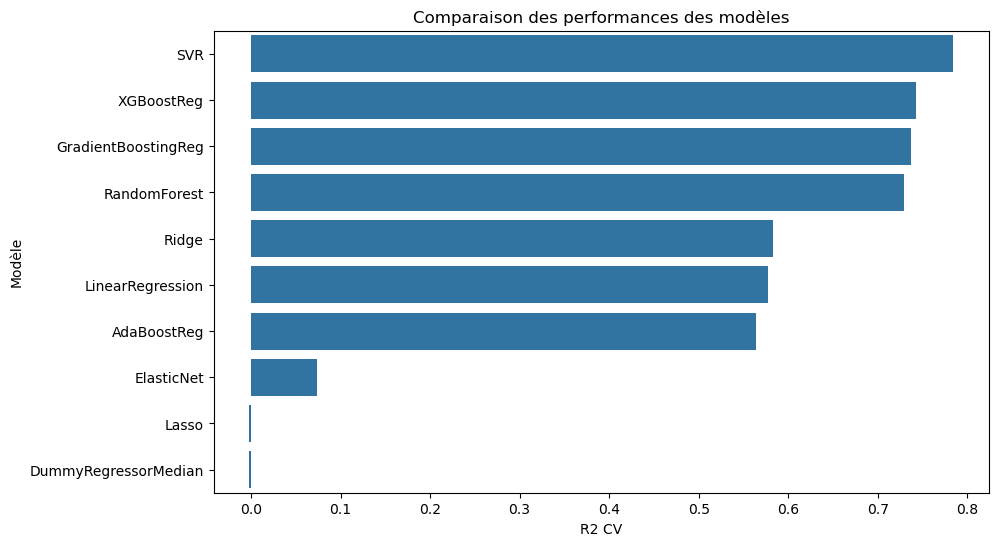

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles SVR est nettement supérieur aux autres si on regarde le R² avec CV.

## SVR

### Le modèle de base

In [34]:
# Créer le modèle SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Entraîner le modèle sur les données d'entraînement mises à l'échelle
svr_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test mis à l'échelle
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculer les métriques pour le modèle SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
smape_svr = 100 * np.mean(2 * np.abs(y_pred_svr - y_test) / (np.abs(y_pred_svr) + np.abs(y_test)))

print("Métriques pour le modèle SVR :")
print("RMSE: {:.2f}".format(rmse_svr))
print("MAE: {:.2f}".format(mae_svr))
print("R2: {:.2f}".format(r2_svr))
print("SMAPE: {:.2f}%".format(smape_svr))

Métriques pour le modèle SVR :
RMSE: 0.65
MAE: 0.50
R2: 0.78
SMAPE: 15.03%


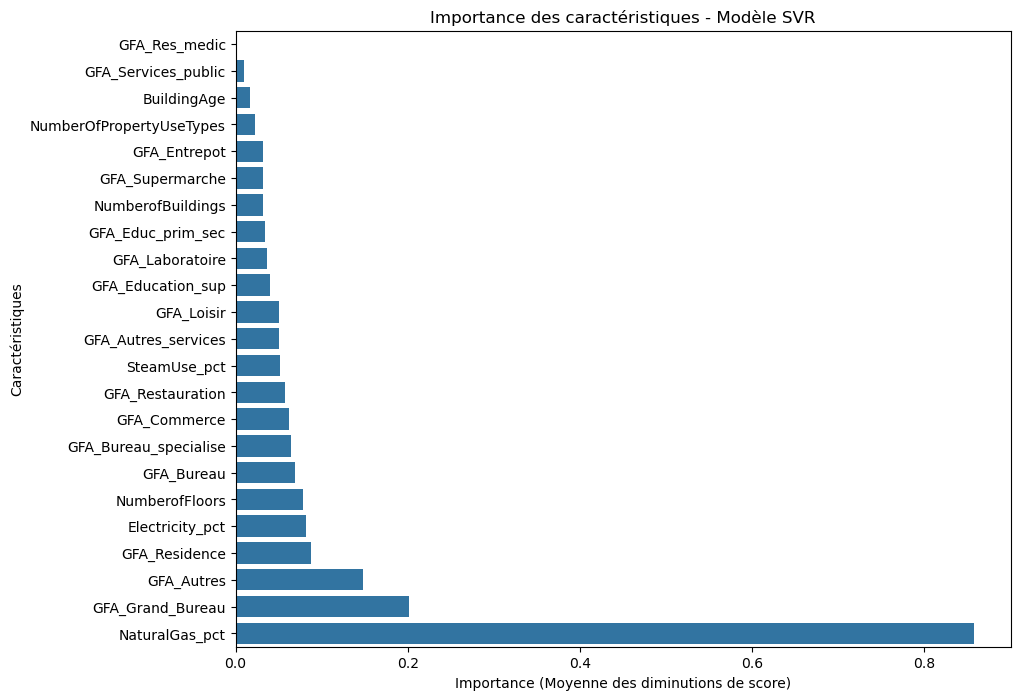

In [35]:
# Calculer l'importance des caractéristiques par permutation
perm_importance = permutation_importance(svr_model, X_test_scaled, y_test, n_repeats=30, random_state=0)

# Créer un DataFrame pour stocker les features et leur importance
features_svr = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})

# Tri des caractéristiques par importance décroissante
features_svr = features_svr.sort_values('Importance', ascending=True)

# Création du graphique
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=features_svr)
plt.title('Importance des caractéristiques - Modèle SVR')
plt.xlabel('Importance (Moyenne des diminutions de score)')
plt.ylabel('Caractéristiques')
plt.show()

### Recherche des hyperparamètres

In [36]:
# Définition de l'espace des hyperparamètres pour RandomizedSearchCV
param_distributions = {
    'C': loguniform(1e-3, 1e3), 
    'epsilon': uniform(0.01, 1), 
    'gamma': loguniform(1e-4, 1e-1) 
}

# Création de l'objet RandomizedSearchCV pour une SVR
random_search_svr = RandomizedSearchCV(estimator=SVR(kernel='rbf'), 
                                        param_distributions=param_distributions,
                                        n_iter=100,  
                                        scoring='neg_mean_squared_error',  
                                        cv=5,  
                                        random_state=0, 
                                        verbose=1)  

# Exécution de la recherche aléatoire
random_search_svr.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour SVR: ", random_search_svr.best_params_)
meilleur_score_rmse_svr = np.sqrt(-random_search_svr.best_score_) 
print("Meilleur score (RMSE) pour SVR: ", meilleur_score_rmse_svr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs hyperparamètres (RandomizedSearchCV) pour SVR:  {'C': 4.935798091294871, 'epsilon': 0.13381998284944152, 'gamma': 0.0349965060627184}
Meilleur score (RMSE) pour SVR:  0.6472626086749553


In [37]:
# Définition de la grille d'hyperparamètres à explorer
param_grid_svr = {
    'C': np.linspace(start=max(0.1, 4.935798091294871 - 1), stop=4.935798091294871 + 1, num=10),
    'epsilon': np.linspace(start=max(0.01, 0.13381998284944152 - 0.05), stop=0.13381998284944152 + 0.05, num=10),
    'gamma': np.linspace(start=max(1e-5, 0.0349965060627184 - 0.01), stop=0.0349965060627184 + 0.01, num=10)
}

# Création de l'objet GridSearchCV pour une SVR
grid_search_svr = GridSearchCV(estimator=SVR(kernel='rbf'), 
                               param_grid=param_grid_svr, 
                               scoring='neg_mean_squared_error', 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=1)

# Exécution de la recherche par grille sur l'ensemble d'entraînement
grid_search_svr.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour SVR: ", grid_search_svr.best_params_)

# Calcul de la RMSE sur l'ensemble de test avec le meilleur modèle trouvé
y_pred_gs_svr = grid_search_svr.best_estimator_.predict(X_test_scaled)
rmse_gs_svr = np.sqrt(mean_squared_error(y_test, y_pred_gs_svr))
mae_gs_svr = mean_absolute_error(y_test, y_pred_gs_svr)
r2_gs_svr = r2_score(y_test, y_pred_gs_svr)
smape_svr = 100 * np.mean(2 * np.abs(y_pred_gs_svr - y_test) / (np.abs(y_pred_gs_svr) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour SVR: {:.4f}".format(rmse_gs_svr))
print("MAE avec GridSearchCV pour SVR: {:.4f}".format(mae_gs_svr))
print("R2 avec GridSearchCV pour SVR: {:.4f}".format(r2_gs_svr))
print("SMAPE avec GridSearchCV pour SVR: {:.4f}%".format(smape_svr))


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Meilleurs hyperparamètres pour SVR:  {'C': 5.935798091294871, 'epsilon': 0.1838199828494415, 'gamma': 0.04055206161827395}
RMSE avec GridSearchCV pour SVR: 0.6023
MAE avec GridSearchCV pour SVR: 0.4510
R2 avec GridSearchCV pour SVR: 0.8128
SMAPE avec GridSearchCV pour SVR: 13.4701%


In [38]:
# Meilleurs hyperparamètres obtenus de GridSearchCV pour SVR
best_params_svr = grid_search_svr.best_params_

# Configuration du modèle SVR avec les meilleurs hyperparamètres
best_svr_model = SVR(**best_params_svr)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results_svr = cross_validate(best_svr_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores_svr = np.sqrt(-cv_results_svr['test_neg_mean_squared_error'])
mae_scores_svr = -cv_results_svr['test_neg_mean_absolute_error']
r2_scores_svr = cv_results_svr['test_r2']

# Affichage avec écart type
print(f"Validation Croisée RMSE pour SVR: {rmse_scores_svr.mean():.4f} (± {rmse_scores_svr.std():.4f})")
print(f"Validation Croisée MAE pour SVR: {mae_scores_svr.mean():.4f} (± {mae_scores_svr.std():.4f})")
print(f"Validation Croisée R² pour SVR: {r2_scores_svr.mean():.4f} (± {r2_scores_svr.std():.4f})")

Validation Croisée RMSE pour SVR: 0.6427 (± 0.0354)
Validation Croisée MAE pour SVR: 0.4737 (± 0.0221)
Validation Croisée R² pour SVR: 0.8068 (± 0.0356)


In [39]:
best_svr_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_svr_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_svr_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_smape = 100 * np.mean(2 * np.abs(y_train_pred - y_train) / (np.abs(y_train_pred) + np.abs(y_train)))

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_smape = 100 * np.mean(2 * np.abs(y_test_pred - y_test) / (np.abs(y_test_pred) + np.abs(y_test)))

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.2f}, R² = {:.2f}, MAE = {:.2f}, SMAPE = {:.2f}%".format(train_rmse, train_r2, train_mae, train_smape))
print("Ensemble de test : RMSE = {:.2f}, R² = {:.2f}, MAE = {:.2f}, SMAPE = {:.2f}%".format(test_rmse, test_r2, test_mae, test_smape))


Ensemble d'entraînement : RMSE = 0.51, R² = 0.88, MAE = 0.36, SMAPE = 13.72%
Ensemble de test : RMSE = 0.60, R² = 0.81, MAE = 0.45, SMAPE = 13.47%


## Analyse des erreurs

### Avec les cibles en log

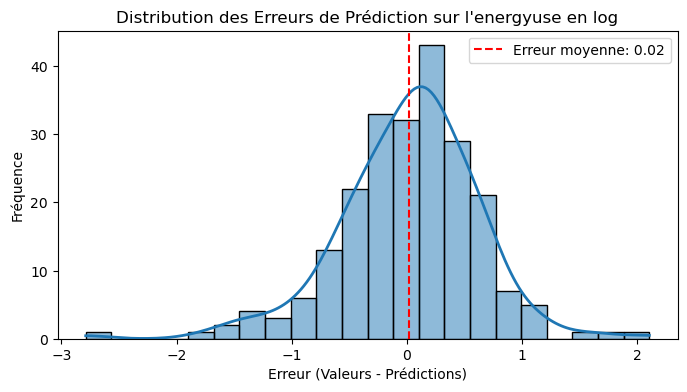

In [40]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

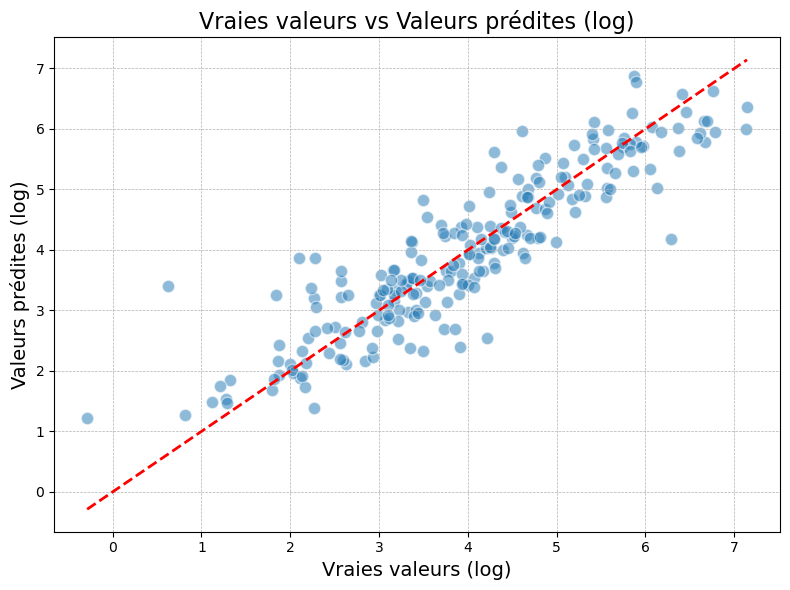

In [41]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


### Avec les valeurs réelles

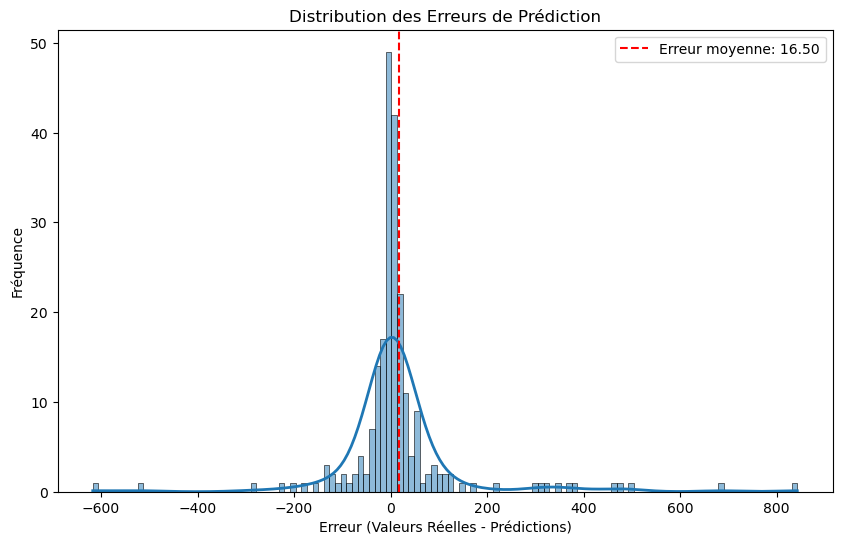

In [45]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

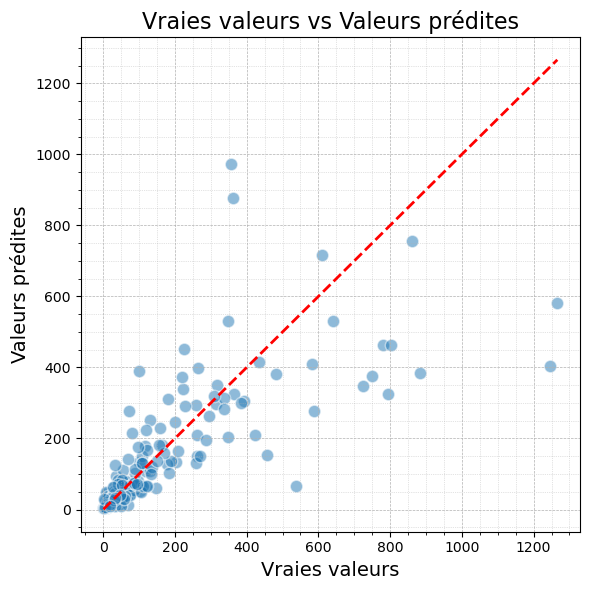

In [46]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [47]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

      Valeurs réelles  Valeurs prédites  Erreurs absolues
83            1246.55        403.974368        842.575632
436           1266.06        580.884245        685.175755
139            355.05        972.119709        617.069709
67             362.82        876.622973        513.802973
332            882.56        385.728365        496.831635
1075           537.03         65.476119        471.553881
158            793.05        326.211642        466.838358
63             723.47        346.428210        377.041790
86             748.55        376.437442        372.112558
10             802.89        462.169351        340.720649
101            780.84        462.093367        318.746633
898            588.25        278.716287        309.533713
1090           457.51        153.232254        304.277746
168            100.65        389.926702        289.276702
199            226.43        452.678116        226.248116


In [48]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire,Log_TotalGHGEmissions,Log_SiteEnergyUseWN
83,1.0,3,0,NaN,57406988.0,1246.55,17,1,0.000000,69.131180,30.868820,0.0,1172127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.128135,17.865677
436,1.0,4,0,NaN,33092532.0,1266.06,90,2,0.000000,32.627796,67.372204,0.0,0.0,0.0,0.0,1500.0,0.0,7165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40584.0,7.143665,17.314818
139,1.0,8,0,76.0,14072349.0,355.05,89,3,26.297171,70.748359,0.000000,0.0,39355.0,19787.0,0.0,95884.0,0.0,0.0,0.0,0.0,166919.0,0.0,0.0,0.0,0.0,0.0,0.0,5.872259,16.459722
67,11.0,2,111625,NaN,37410800.0,362.82,46,1,0.000000,89.414907,6.523913,0.0,0.0,0.0,0.0,0.0,667335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.893907,17.437470
332,1.0,76,319400,86.0,92537256.0,882.56,31,2,0.000000,94.527767,5.472233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1680937.0,0.0,0.0,0.0,319368.0,0.0,0.0,6.782827,18.343122
1075,1.0,4,0,NaN,41225944.0,537.03,11,2,0.000000,85.166916,13.348068,0.0,0.0,0.0,0.0,733.0,0.0,0.0,0.0,0.0,88698.0,0.0,0.0,0.0,72726.0,0.0,0.0,6.286054,17.534578
158,1.0,30,134662,72.0,53974556.0,793.05,31,5,0.962287,80.037644,15.760841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643083.0,0.0,0.0,13422.0,126891.0,0.0,0.0,6.675886,17.804023
63,1.0,1,0,98.0,28763498.0,723.47,65,2,0.000000,56.406662,39.955165,0.0,0.0,505103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24936.0,0.0,0.0,0.0,6.584059,17.174618
86,14.0,2,31874,NaN,54136068.0,748.55,36,4,0.000000,83.717528,15.045976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240984.0,0.0,0.0,0.0,16766.0,0.0,72963.0,6.618138,17.807011
10,1.0,28,85000,31.0,34351920.0,802.89,33,2,0.000000,61.787746,35.897484,348329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85000.0,0.0,0.0,6.688218,17.352168


# Analyse de l'influance de l'Energy Star Score

## Sélection des données

In [49]:
df_nrjstar = df.dropna(subset=['ENERGYSTARScore'])
df_nrjstar.shape

(720, 29)

## Importance des features

### Data preparation

In [50]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN'], axis=1)
target = df_nrjstar['Log_SiteEnergyUseWN']

In [51]:
features.head(1)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
0,1.0,12,0,60.0,89,1,26.87282,52.917723,17.11772,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Séparation des données

In [52]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((576, 25), (144, 25))

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 558 to 145
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberofBuildings         576 non-null    float64
 1   NumberofFloors            576 non-null    int64  
 2   PropertyGFAParking        576 non-null    int64  
 3   ENERGYSTARScore           576 non-null    float64
 4   BuildingAge               576 non-null    int64  
 5   NumberOfPropertyUseTypes  576 non-null    int64  
 6   SteamUse_pct              576 non-null    float64
 7   Electricity_pct           576 non-null    float64
 8   NaturalGas_pct            576 non-null    float64
 9   GFA_Residence             576 non-null    float64
 10  GFA_Loisir                576 non-null    float64
 11  GFA_Commerce              576 non-null    float64
 12  GFA_Services_public       576 non-null    float64
 13  GFA_Autres                576 non-null    float64
 14  GFA_Education

In [54]:
X_train.head()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
558,1.0,4,0,82.0,9,1,0.000000,38.884553,50.065122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49468.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,1.0,3,0,21.0,9,3,0.000000,78.736865,17.324243,0.0,0.0,0.0,0.0,10000.0,0.0,30000.0,0.0,15000.0,0.0,0.0,0.0,0.0,9015.0,0.0,0.0
151,1.0,10,0,91.0,58,1,31.324904,63.535077,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144570.0,0.0,0.0,0.0,0.0,0.0,0.0
979,1.0,4,0,96.0,51,2,0.000000,66.162952,26.868334,0.0,0.0,0.0,0.0,0.0,0.0,40768.0,0.0,0.0,0.0,0.0,0.0,0.0,16128.0,0.0,0.0
91,1.0,16,0,49.0,85,1,0.000000,28.231010,66.373646,106860.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
y_train.head()

558    14.564688
62     15.031911
151    15.728251
979    14.225679
91     16.350509
Name: Log_SiteEnergyUseWN, dtype: float64

### Standardisation

In [56]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [57]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
558,-0.052778,-0.053872,-0.263674,0.681475,-1.524810,-0.700389,-0.234199,-1.033972,1.007455,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,1.757345,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568
62,-0.052778,-0.209022,-0.263674,-1.482688,-1.524810,1.752036,-0.234199,0.412858,-0.341349,-0.212491,-0.072061,-0.209671,-0.042246,0.184373,-0.041703,1.045776,-0.165975,0.008810,-0.264463,-0.08281,-0.164862,-0.16383,-0.001001,-0.217477,-0.06568
151,-0.052778,0.877031,-0.263674,1.000778,0.050686,-0.700389,3.634387,-0.139040,-1.055044,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,-0.165975,-0.388913,0.968104,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568
979,-0.052778,-0.053872,-0.263674,1.178168,-0.174385,0.525824,-0.234199,-0.043635,0.051833,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,1.612700,-0.165975,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,0.225327,-0.217477,-0.06568
91,-0.052778,1.807934,-0.263674,-0.489302,0.918816,-0.700389,-0.234199,-1.420747,1.679306,2.238258,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,-0.165975,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568


### Test de Student

In [58]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.676
Method:                  Least Squares   F-statistic:                     48.99
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):          1.90e-122
Time:                         19:58:06   Log-Likelihood:                -569.42
No. Observations:                  576   AIC:                             1191.
Df Residuals:                      550   BIC:                             1304.
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [59]:
# Suppression du NumberofFloors
X_train_scaled_df.drop(columns=['NumberofBuildings'], inplace=True)

In [60]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.677
Method:                  Least Squares   F-statistic:                     51.12
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):          2.63e-123
Time:                         19:58:14   Log-Likelihood:                -569.42
No. Observations:                  576   AIC:                             1189.
Df Residuals:                      551   BIC:                             1298.
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

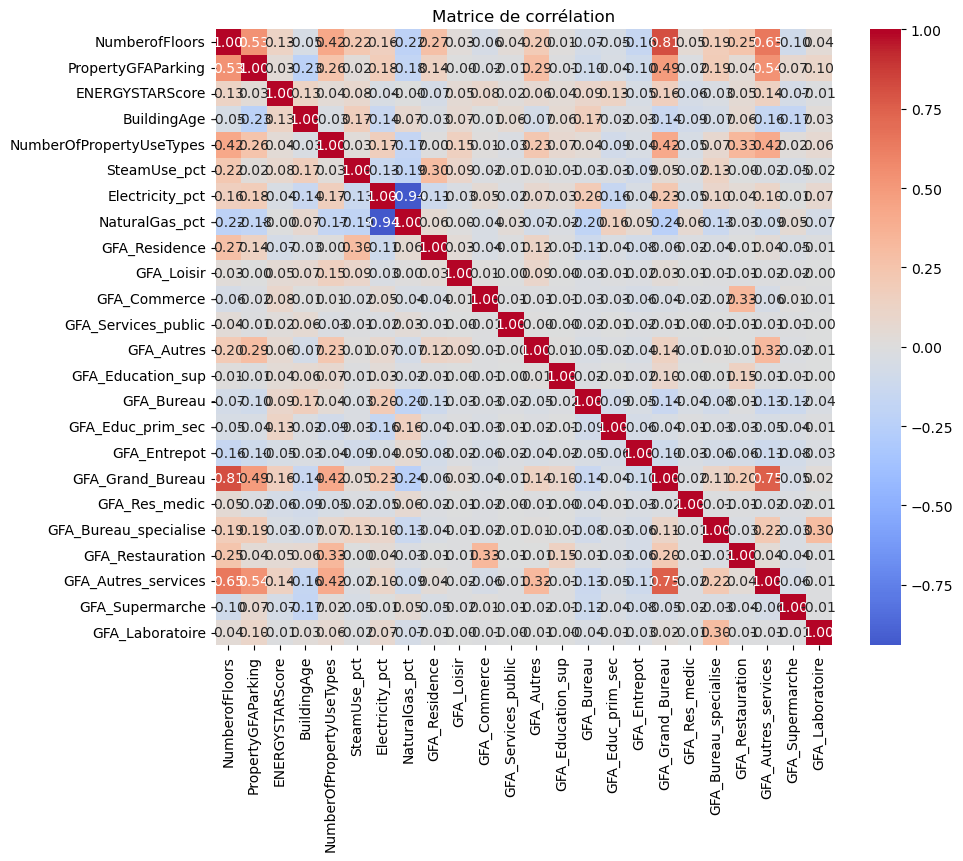

In [61]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## Tests de modèles

### Data preparation

In [84]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN',  
                    'NumberofBuildings'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [85]:
features.head(1)

,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
0,12,0,60.0,89,1,26.87282,52.917723,17.11772,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((576, 24), (144, 24))

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 558 to 145
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberofFloors            576 non-null    int64  
 1   PropertyGFAParking        576 non-null    int64  
 2   ENERGYSTARScore           576 non-null    float64
 3   BuildingAge               576 non-null    int64  
 4   NumberOfPropertyUseTypes  576 non-null    int64  
 5   SteamUse_pct              576 non-null    float64
 6   Electricity_pct           576 non-null    float64
 7   NaturalGas_pct            576 non-null    float64
 8   GFA_Residence             576 non-null    float64
 9   GFA_Loisir                576 non-null    float64
 10  GFA_Commerce              576 non-null    float64
 11  GFA_Services_public       576 non-null    float64
 12  GFA_Autres                576 non-null    float64
 13  GFA_Education_sup         576 non-null    float64
 14  GFA_Bureau   

In [88]:
X_train.head()

,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
558,4,0,82.0,9,1,0.000000,38.884553,50.065122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49468.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,3,0,21.0,9,3,0.000000,78.736865,17.324243,0.0,0.0,0.0,0.0,10000.0,0.0,30000.0,0.0,15000.0,0.0,0.0,0.0,0.0,9015.0,0.0,0.0
151,10,0,91.0,58,1,31.324904,63.535077,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144570.0,0.0,0.0,0.0,0.0,0.0,0.0
979,4,0,96.0,51,2,0.000000,66.162952,26.868334,0.0,0.0,0.0,0.0,0.0,0.0,40768.0,0.0,0.0,0.0,0.0,0.0,0.0,16128.0,0.0,0.0
91,16,0,49.0,85,1,0.000000,28.231010,66.373646,106860.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Standardisation

In [89]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [90]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
558,-0.053872,-0.263674,0.681475,-1.524810,-0.700389,-0.234199,-1.033972,1.007455,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,1.757345,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568
62,-0.209022,-0.263674,-1.482688,-1.524810,1.752036,-0.234199,0.412858,-0.341349,-0.212491,-0.072061,-0.209671,-0.042246,0.184373,-0.041703,1.045776,-0.165975,0.008810,-0.264463,-0.08281,-0.164862,-0.16383,-0.001001,-0.217477,-0.06568
151,0.877031,-0.263674,1.000778,0.050686,-0.700389,3.634387,-0.139040,-1.055044,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,-0.165975,-0.388913,0.968104,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568
979,-0.053872,-0.263674,1.178168,-0.174385,0.525824,-0.234199,-0.043635,0.051833,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,1.612700,-0.165975,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,0.225327,-0.217477,-0.06568
91,1.807934,-0.263674,-0.489302,0.918816,-0.700389,-0.234199,-1.420747,1.679306,2.238258,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,-0.165975,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568


### Test globale

In [91]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [92]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

,Modèle,RMSE,MAE,R2,RMSE CV,R2 CV,R2 CV Std,Temps de calcul
8,SVR,0.529397,0.366515,0.863412,0.499060,0.867229,0.028011,0.014003
7,XGBoostReg,0.633242,0.462196,0.804571,0.554938,0.837928,0.027085,0.086525
6,GradientBoostingReg,0.618614,0.467486,0.813496,0.562831,0.832667,0.032496,0.139538
5,RandomForest,0.666441,0.477542,0.783543,0.610515,0.801012,0.049509,0.445252
2,Ridge,0.962866,0.624896,0.548163,0.783449,0.674280,0.065631,0.001000
9,AdaBoostReg,0.918810,0.725298,0.588565,0.818204,0.645862,0.062365,0.077053
1,LinearRegression,0.962216,0.628410,0.548774,0.909854,0.538771,0.218768,0.000000
4,ElasticNet,1.377202,1.103273,0.075632,1.344635,0.057338,0.009176,0.001000
3,Lasso,1.433127,1.152824,-0.000964,1.392257,-0.011579,0.009053,0.001000
0,DummyRegressorMedian,1.433838,1.154873,-0.001958,1.394508,-0.015238,0.013337,0.001000


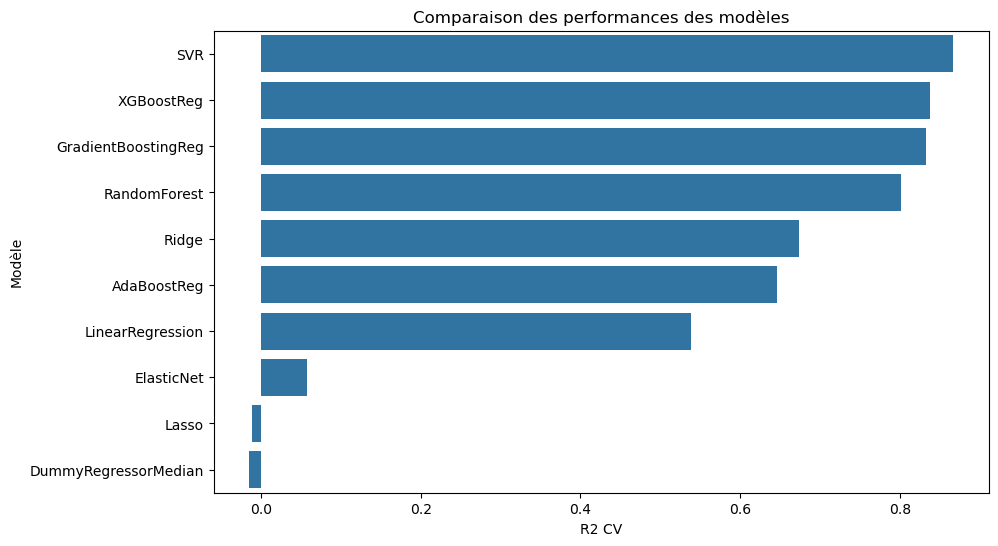

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles SVR est nettement supérieur aux autres si on regarde le R² avec CV.

## SVR

### Le modèle de base

In [94]:
# Créer le modèle SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Entraîner le modèle sur les données d'entraînement mises à l'échelle
svr_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test mis à l'échelle
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculer les métriques pour le modèle SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
smape_svr = 100 * np.mean(2 * np.abs(y_pred_svr - y_test) / (np.abs(y_pred_svr) + np.abs(y_test)))

print("Métriques pour le modèle SVR :")
print("RMSE: {:.2f}".format(rmse_svr))
print("MAE: {:.2f}".format(mae_svr))
print("R2: {:.2f}".format(r2_svr))
print("SMAPE: {:.2f}%".format(smape_svr))

Métriques pour le modèle SVR :
RMSE: 0.53
MAE: 0.37
R2: 0.86
SMAPE: 11.80%


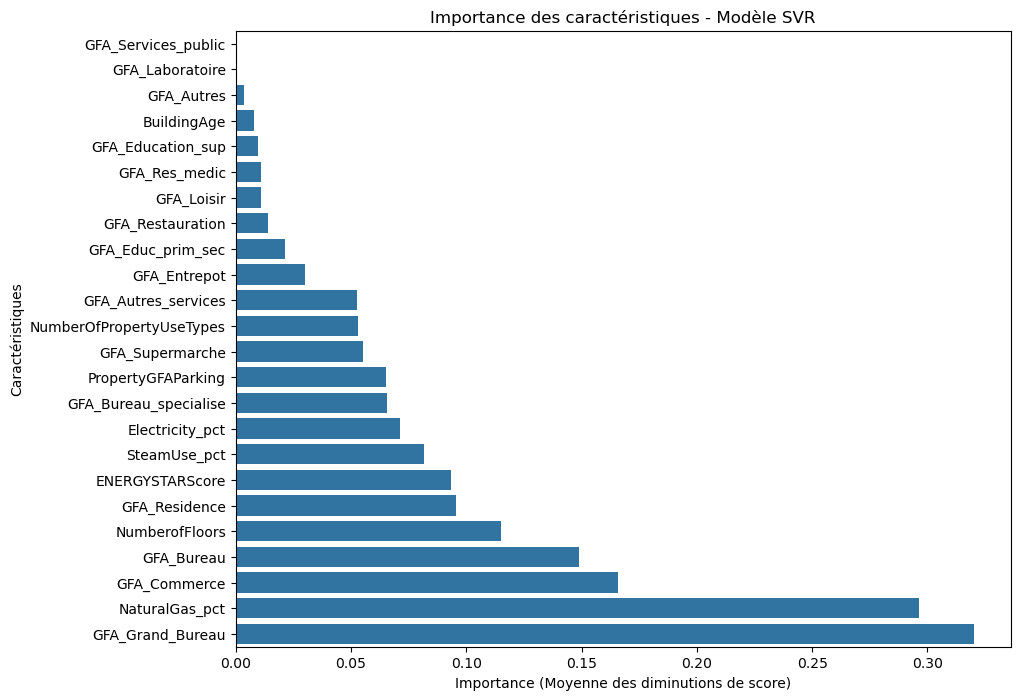

In [95]:
# Calculer l'importance des caractéristiques par permutation
perm_importance = permutation_importance(svr_model, X_test_scaled, y_test, n_repeats=30, random_state=0)

# Créer un DataFrame pour stocker les features et leur importance
features_svr = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})

# Tri des caractéristiques par importance décroissante
features_svr = features_svr.sort_values('Importance', ascending=True)

# Création du graphique
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=features_svr)
plt.title('Importance des caractéristiques - Modèle SVR')
plt.xlabel('Importance (Moyenne des diminutions de score)')
plt.ylabel('Caractéristiques')
plt.show()

### Recherche des hyperparamètres

In [96]:
# Définition de l'espace des hyperparamètres pour RandomizedSearchCV
param_distributions = {
    'C': loguniform(1e-3, 1e3), 
    'epsilon': uniform(0.01, 1), 
    'gamma': loguniform(1e-4, 1e-1) 
}

# Création de l'objet RandomizedSearchCV pour une SVR
random_search_svr = RandomizedSearchCV(estimator=SVR(kernel='rbf'), 
                                        param_distributions=param_distributions,
                                        n_iter=100,  
                                        scoring='neg_mean_squared_error',  
                                        cv=5,  
                                        random_state=0, 
                                        verbose=1)  

# Exécution de la recherche aléatoire
random_search_svr.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour SVR: ", random_search_svr.best_params_)
meilleur_score_rmse_svr = np.sqrt(-random_search_svr.best_score_) 
print("Meilleur score (RMSE) pour SVR: ", meilleur_score_rmse_svr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs hyperparamètres (RandomizedSearchCV) pour SVR:  {'C': 3.3042858368124133, 'epsilon': 0.030107546187493554, 'gamma': 0.03067750867937879}
Meilleur score (RMSE) pour SVR:  0.44878789149883797


In [97]:
# Définition de la grille d'hyperparamètres à explorer
param_grid_svr = {
    'C': np.linspace(start=max(0.1, 3.3042858368124133 - 1), stop=3.3042858368124133 + 1, num=10),
    'epsilon': np.linspace(start=max(0.01, 0.030107546187493554 - 0.05), stop=0.030107546187493554 + 0.05, num=10),
    'gamma': np.linspace(start=max(1e-5, 0.03067750867937879 - 0.01), stop=0.03067750867937879 + 0.01, num=10)
}

# Création de l'objet GridSearchCV pour une SVR
grid_search_svr = GridSearchCV(estimator=SVR(kernel='rbf'), 
                               param_grid=param_grid_svr, 
                               scoring='neg_mean_squared_error', 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=1)

# Exécution de la recherche par grille sur l'ensemble d'entraînement
grid_search_svr.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour SVR: ", grid_search_svr.best_params_)

# Calcul de la RMSE sur l'ensemble de test avec le meilleur modèle trouvé
y_pred_gs_svr = grid_search_svr.best_estimator_.predict(X_test_scaled)
rmse_gs_svr = np.sqrt(mean_squared_error(y_test, y_pred_gs_svr))
mae_gs_svr = mean_absolute_error(y_test, y_pred_gs_svr)
r2_gs_svr = r2_score(y_test, y_pred_gs_svr)
smape_svr = 100 * np.mean(2 * np.abs(y_pred_gs_svr - y_test) / (np.abs(y_pred_gs_svr) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour SVR: {:.4f}".format(rmse_gs_svr))
print("MAE avec GridSearchCV pour SVR: {:.4f}".format(mae_gs_svr))
print("R2 avec GridSearchCV pour SVR: {:.4f}".format(r2_gs_svr))
print("SMAPE avec GridSearchCV pour SVR: {:.4f}%".format(smape_svr))


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Meilleurs hyperparamètres pour SVR:  {'C': 4.304285836812413, 'epsilon': 0.01, 'gamma': 0.03401084201271212}
RMSE avec GridSearchCV pour SVR: 0.4930
MAE avec GridSearchCV pour SVR: 0.3362
R2 avec GridSearchCV pour SVR: 0.8815
SMAPE avec GridSearchCV pour SVR: 10.8748%


In [98]:
# Meilleurs hyperparamètres obtenus de GridSearchCV pour SVR
best_params_svr = grid_search_svr.best_params_

# Configuration du modèle SVR avec les meilleurs hyperparamètres
best_svr_model = SVR(**best_params_svr)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results_svr = cross_validate(best_svr_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores_svr = np.sqrt(-cv_results_svr['test_neg_mean_squared_error'])
mae_scores_svr = -cv_results_svr['test_neg_mean_absolute_error']
r2_scores_svr = cv_results_svr['test_r2']

# Affichage avec écart type
print(f"Validation Croisée RMSE pour SVR: {rmse_scores_svr.mean():.4f} (± {rmse_scores_svr.std():.4f})")
print(f"Validation Croisée MAE pour SVR: {mae_scores_svr.mean():.4f} (± {mae_scores_svr.std():.4f})")
print(f"Validation Croisée R² pour SVR: {r2_scores_svr.mean():.4f} (± {r2_scores_svr.std():.4f})")

Validation Croisée RMSE pour SVR: 0.4395 (± 0.0401)
Validation Croisée MAE pour SVR: 0.3232 (± 0.0311)
Validation Croisée R² pour SVR: 0.8976 (± 0.0191)


In [99]:
best_svr_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_svr_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_svr_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_smape = 100 * np.mean(2 * np.abs(y_train_pred - y_train) / (np.abs(y_train_pred) + np.abs(y_train)))

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_smape = 100 * np.mean(2 * np.abs(y_test_pred - y_test) / (np.abs(y_test_pred) + np.abs(y_test)))

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.2f}, R² = {:.2f}, MAE = {:.2f}, SMAPE = {:.2f}%".format(train_rmse, train_r2, train_mae, train_smape))
print("Ensemble de test : RMSE = {:.2f}, R² = {:.2f}, MAE = {:.2f}, SMAPE = {:.2f}%".format(test_rmse, test_r2, test_mae, test_smape))


Ensemble d'entraînement : RMSE = 0.31, R² = 0.95, MAE = 0.19, SMAPE = 7.50%
Ensemble de test : RMSE = 0.49, R² = 0.88, MAE = 0.34, SMAPE = 10.87%


## Analyse des erreurs

### Avec les cibles en log

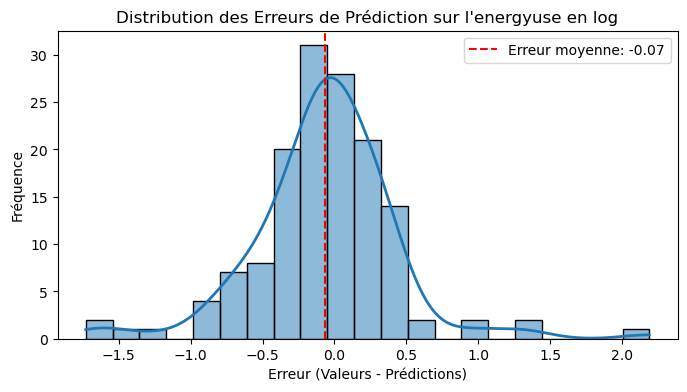

In [100]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

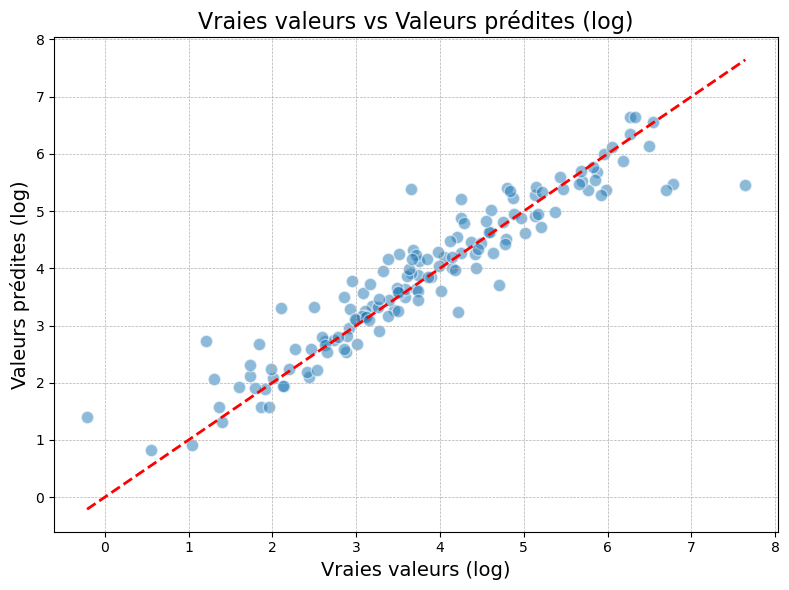

In [101]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


### Avec les valeurs réelles

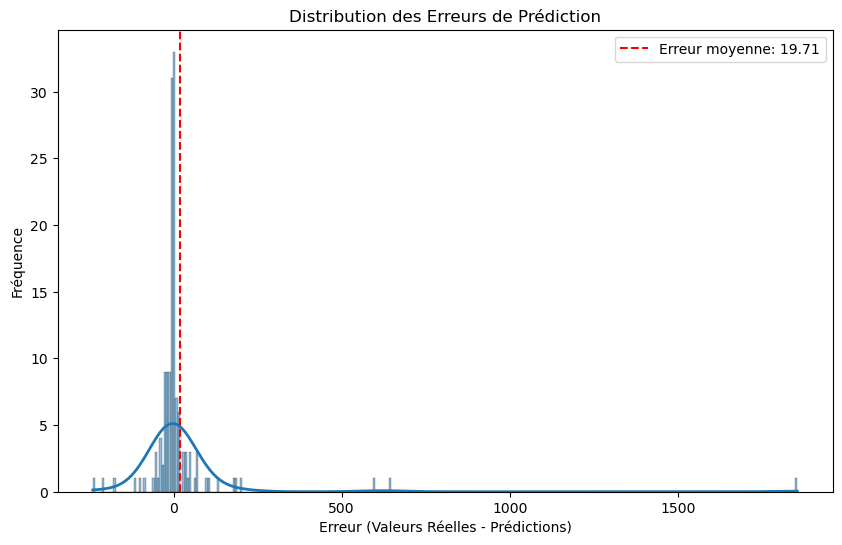

In [102]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

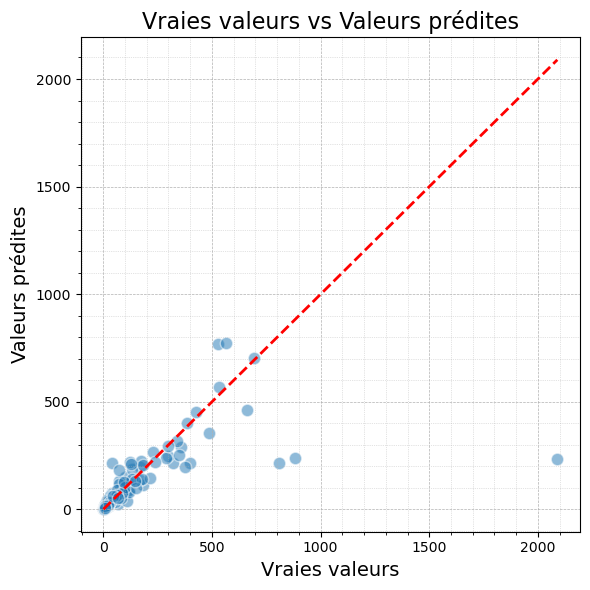

In [103]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [104]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

     Valeurs réelles  Valeurs prédites  Erreurs absolues
2            2089.28        234.158935       1855.121065
332           882.56        238.166672        644.393328
281           810.70        214.520453        596.179547
42            526.85        767.166158        240.316158
111           563.25        773.370469        210.120469
98            661.04        462.725308        198.314692
106           398.19        215.042263        183.147737
182            38.59        217.398260        178.808260
179           374.92        197.596751        177.323249
577           487.53        355.620726        131.909274
117            70.15        182.364920        112.214920
118           318.97        215.650366        103.319634
473           120.91        221.668408        100.758408
12            349.32        254.498872         94.821128
451           126.30        212.321498         86.021498


In [105]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire,Log_TotalGHGEmissions,Log_SiteEnergyUseWN
2,1.0,41,196718,43.0,73937112.0,2089.28,47,1,29.168781,66.984851,2.020366,756493.0,0.0,0.000000,0.0,2899.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.644575,18.118725
332,1.0,76,319400,86.0,92537256.0,882.56,31,2,0.000000,94.527767,5.472233,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1680937.0,0.0,0.0,0.0,319368.0,0.0,0.0,6.782827,18.343122
281,1.0,6,0,79.0,75252304.0,810.70,104,3,0.000000,90.044480,8.464884,0.0,0.0,281296.000000,0.0,0.000000,0.0,0.0,0.0,220303.0,1000730.0,0.0,0.0,0.0,0.0,0.0,0.0,6.697898,18.136357
42,1.0,7,44766,37.0,20194606.0,526.85,26,2,0.000000,54.374183,41.984731,235788.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51537.0,0.0,0.0,6.266916,16.820926
111,1.0,20,32334,90.0,15742790.0,563.25,47,2,41.725971,51.225983,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,226454.0,0.0,0.0,0.0,29214.0,0.0,0.0,6.333724,16.571893
98,1.0,5,39000,1.0,28731502.0,661.04,89,2,0.000000,65.243512,34.756481,0.0,0.0,0.000000,0.0,0.000000,0.0,9805.0,0.0,0.0,0.0,0.0,146741.0,0.0,0.0,0.0,0.0,6.493814,17.173505
106,1.0,10,0,93.0,40037736.0,398.19,91,2,0.052994,93.595531,6.351475,0.0,0.0,361107.000000,0.0,0.000000,0.0,332343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.986929,17.505333
182,1.0,5,0,93.0,5535626.0,38.59,33,4,0.000000,99.999982,0.000000,0.0,0.0,0.000000,0.0,0.000000,30177.0,0.0,0.0,0.0,91281.0,0.0,5931.0,0.0,0.0,0.0,0.0,3.652993,15.526715
179,1.0,3,47656,7.0,11672252.0,374.92,15,1,0.000000,42.016254,54.964475,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,63199.0,0.0,0.0,0.0,0.0,0.0,0.0,5.926713,16.272725
577,1.0,5,0,77.0,28053172.0,487.53,7,3,0.000000,77.443143,22.556843,0.0,0.0,0.000000,0.0,15416.000000,0.0,0.0,0.0,0.0,329850.0,0.0,0.0,0.0,162894.0,0.0,0.0,6.189352,17.149612


## Test sans l'Energy Star Score

### Data preparation

In [106]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

In [107]:
features.head(1)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
0,1.0,12,0,89,1,26.87282,52.917723,17.11772,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Séparation des données

In [108]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((576, 24), (144, 24))

### Standardisation

In [109]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [110]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)

### Test de Student

In [111]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.727
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     61.15
Date:                   Mon, 26 Feb 2024   Prob (F-statistic):          3.00e-138
Time:                           20:03:20   Log-Likelihood:                -634.05
No. Observations:                    576   AIC:                             1318.
Df Residuals:                        551   BIC:                             1427.
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [112]:
# Suppression du NumberofFloors
X_train_scaled_df.drop(columns=['NumberofBuildings'], inplace=True)

In [113]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.727
Model:                               OLS   Adj. R-squared:                  0.716
Method:                    Least Squares   F-statistic:                     63.91
Date:                   Mon, 26 Feb 2024   Prob (F-statistic):          3.79e-139
Time:                           20:03:32   Log-Likelihood:                -634.08
No. Observations:                    576   AIC:                             1316.
Df Residuals:                        552   BIC:                             1421.
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

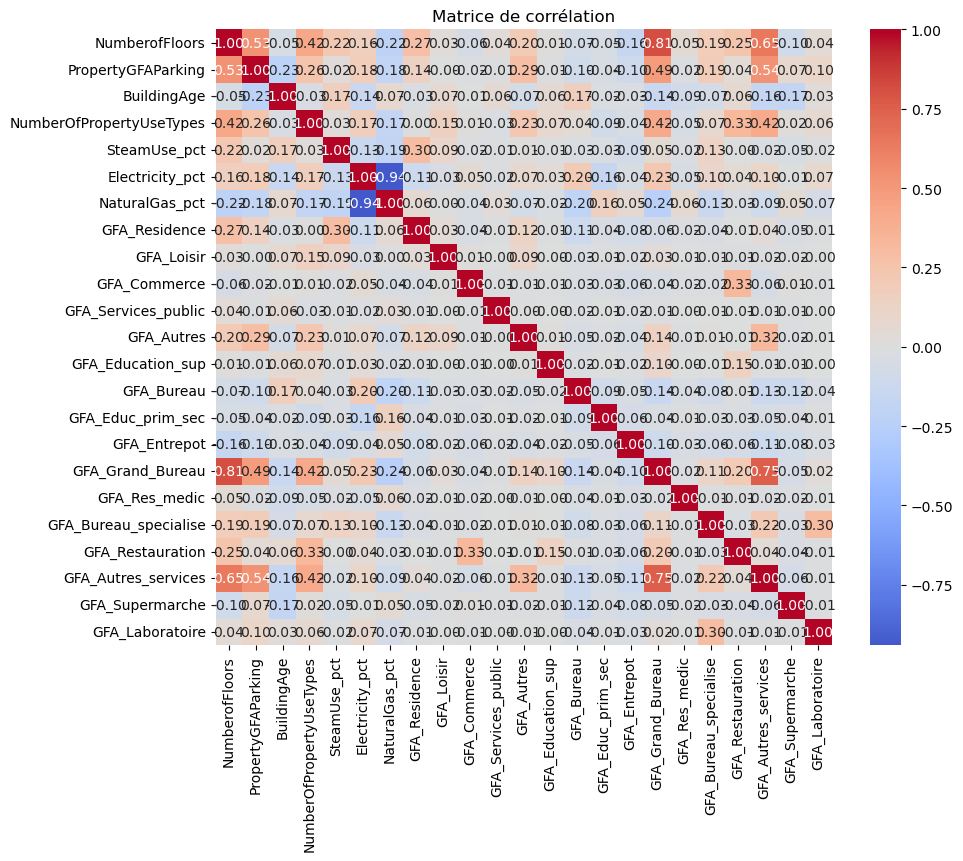

In [114]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## SVR

### Data preparation

In [115]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN',  'ENERGYSTARScore',
                    'PropertyGFAParking', 'NumberofBuildings'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [116]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((576, 22), (144, 22))

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 558 to 145
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumberofFloors            576 non-null    int64  
 1   BuildingAge               576 non-null    int64  
 2   NumberOfPropertyUseTypes  576 non-null    int64  
 3   SteamUse_pct              576 non-null    float64
 4   Electricity_pct           576 non-null    float64
 5   NaturalGas_pct            576 non-null    float64
 6   GFA_Residence             576 non-null    float64
 7   GFA_Loisir                576 non-null    float64
 8   GFA_Commerce              576 non-null    float64
 9   GFA_Services_public       576 non-null    float64
 10  GFA_Autres                576 non-null    float64
 11  GFA_Education_sup         576 non-null    float64
 12  GFA_Bureau                576 non-null    float64
 13  GFA_Educ_prim_sec         576 non-null    float64
 14  GFA_Entrepot 

### Standardisation

In [118]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [119]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

,NumberofFloors,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire
558,-0.053872,-1.524810,-0.700389,-0.234199,-1.033972,1.007455,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,1.757345,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568
62,-0.209022,-1.524810,1.752036,-0.234199,0.412858,-0.341349,-0.212491,-0.072061,-0.209671,-0.042246,0.184373,-0.041703,1.045776,-0.165975,0.008810,-0.264463,-0.08281,-0.164862,-0.16383,-0.001001,-0.217477,-0.06568
151,0.877031,0.050686,-0.700389,3.634387,-0.139040,-1.055044,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,-0.165975,-0.388913,0.968104,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568
979,-0.053872,-0.174385,0.525824,-0.234199,-0.043635,0.051833,-0.212491,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,1.612700,-0.165975,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,0.225327,-0.217477,-0.06568
91,1.807934,0.918816,-0.700389,-0.234199,-1.420747,1.679306,2.238258,-0.072061,-0.209671,-0.042246,-0.119979,-0.041703,-0.533691,-0.165975,-0.388913,-0.264463,-0.08281,-0.164862,-0.16383,-0.287850,-0.217477,-0.06568


### Le modèle de base

In [120]:
# Créer le modèle SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Entraîner le modèle sur les données d'entraînement mises à l'échelle
svr_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test mis à l'échelle
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculer les métriques pour le modèle SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
smape_svr = 100 * np.mean(2 * np.abs(y_pred_svr - y_test) / (np.abs(y_pred_svr) + np.abs(y_test)))

print("Métriques pour le modèle SVR :")
print("RMSE: {:.2f}".format(rmse_svr))
print("MAE: {:.2f}".format(mae_svr))
print("R2: {:.2f}".format(r2_svr))
print("SMAPE: {:.2f}%".format(smape_svr))

Métriques pour le modèle SVR :
RMSE: 0.60
MAE: 0.45
R2: 0.82
SMAPE: 14.28%


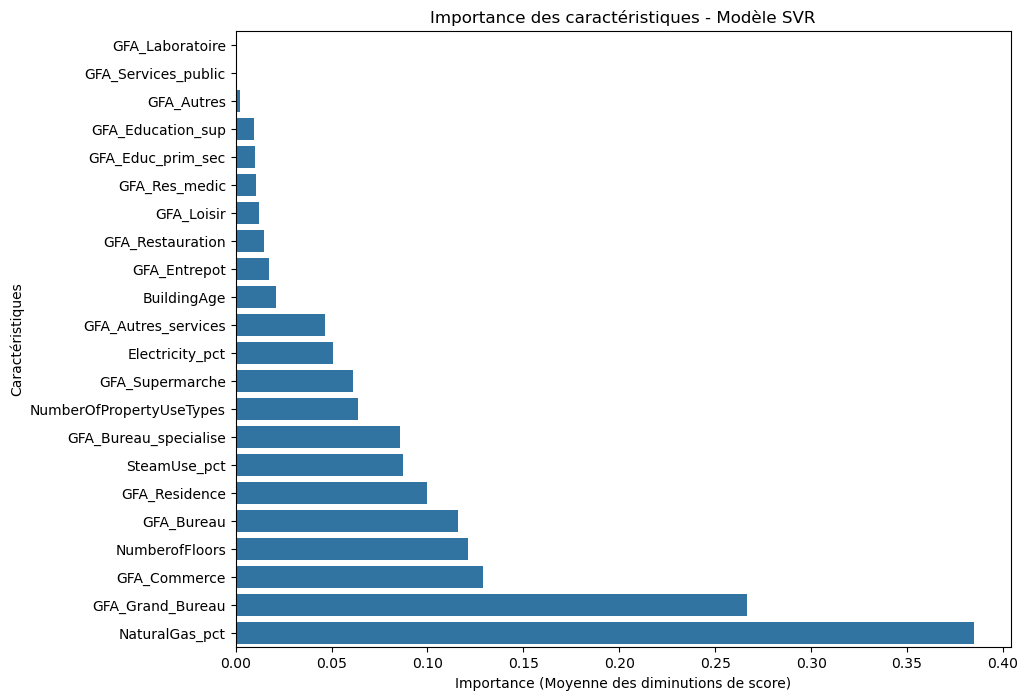

In [121]:
# Calculer l'importance des caractéristiques par permutation
perm_importance = permutation_importance(svr_model, X_test_scaled, y_test, n_repeats=30, random_state=0)

# Créer un DataFrame pour stocker les features et leur importance
features_svr = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})

# Tri des caractéristiques par importance décroissante
features_svr = features_svr.sort_values('Importance', ascending=True)

# Création du graphique
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=features_svr)
plt.title('Importance des caractéristiques - Modèle SVR')
plt.xlabel('Importance (Moyenne des diminutions de score)')
plt.ylabel('Caractéristiques')
plt.show()

### Recherche des hyperparamètres

In [122]:
# Définition de l'espace des hyperparamètres pour RandomizedSearchCV
param_distributions = {
    'C': loguniform(1e-3, 1e3), 
    'epsilon': uniform(0.01, 1), 
    'gamma': loguniform(1e-4, 1e-1) 
}

# Création de l'objet RandomizedSearchCV pour une SVR
random_search_svr = RandomizedSearchCV(estimator=SVR(kernel='rbf'), 
                                        param_distributions=param_distributions,
                                        n_iter=100,  
                                        scoring='neg_mean_squared_error',  
                                        cv=5,  
                                        random_state=0, 
                                        verbose=1)  

# Exécution de la recherche aléatoire
random_search_svr.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour SVR: ", random_search_svr.best_params_)
meilleur_score_rmse_svr = np.sqrt(-random_search_svr.best_score_) 
print("Meilleur score (RMSE) pour SVR: ", meilleur_score_rmse_svr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs hyperparamètres (RandomizedSearchCV) pour SVR:  {'C': 4.935798091294871, 'epsilon': 0.13381998284944152, 'gamma': 0.0349965060627184}
Meilleur score (RMSE) pour SVR:  0.5758028938671329


In [123]:
# Définition de la grille d'hyperparamètres à explorer
param_grid_svr = {
    'C': np.linspace(start=max(0.1, 4.935798091294871 - 1), stop=4.935798091294871 + 1, num=10),
    'epsilon': np.linspace(start=max(0.01, 0.13381998284944152 - 0.05), stop=0.13381998284944152 + 0.05, num=10),
    'gamma': np.linspace(start=max(1e-5, 0.0349965060627184 - 0.01), stop=00.0349965060627184 + 0.01, num=10)
}

# Création de l'objet GridSearchCV pour une SVR
grid_search_svr = GridSearchCV(estimator=SVR(kernel='rbf'), 
                               param_grid=param_grid_svr, 
                               scoring='neg_mean_squared_error', 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=1)

# Exécution de la recherche par grille sur l'ensemble d'entraînement
grid_search_svr.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour SVR: ", grid_search_svr.best_params_)

# Calcul de la RMSE sur l'ensemble de test avec le meilleur modèle trouvé
y_pred_gs_svr = grid_search_svr.best_estimator_.predict(X_test_scaled)
rmse_gs_svr = np.sqrt(mean_squared_error(y_test, y_pred_gs_svr))
mae_gs_svr = mean_absolute_error(y_test, y_pred_gs_svr)
r2_gs_svr = r2_score(y_test, y_pred_gs_svr)
smape_svr = 100 * np.mean(2 * np.abs(y_pred_gs_svr - y_test) / (np.abs(y_pred_gs_svr) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour SVR: {:.4f}".format(rmse_gs_svr))
print("MAE avec GridSearchCV pour SVR: {:.4f}".format(mae_gs_svr))
print("R2 avec GridSearchCV pour SVR: {:.4f}".format(r2_gs_svr))
print("SMAPE avec GridSearchCV pour SVR: {:.4f}%".format(smape_svr))


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Meilleurs hyperparamètres pour SVR:  {'C': 5.935798091294871, 'epsilon': 0.10604220507166373, 'gamma': 0.0449965060627184}
RMSE avec GridSearchCV pour SVR: 0.5969
MAE avec GridSearchCV pour SVR: 0.4386
R2 avec GridSearchCV pour SVR: 0.8263
SMAPE avec GridSearchCV pour SVR: 14.1921%


In [124]:
# Meilleurs hyperparamètres obtenus de GridSearchCV pour SVR
best_params_svr = grid_search_svr.best_params_

# Configuration du modèle SVR avec les meilleurs hyperparamètres
best_svr_model = SVR(**best_params_svr)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results_svr = cross_validate(best_svr_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores_svr = np.sqrt(-cv_results_svr['test_neg_mean_squared_error'])
mae_scores_svr = -cv_results_svr['test_neg_mean_absolute_error']
r2_scores_svr = cv_results_svr['test_r2']

# Affichage avec écart type
print(f"Validation Croisée RMSE pour SVR: {rmse_scores_svr.mean():.4f} (± {rmse_scores_svr.std():.4f})")
print(f"Validation Croisée MAE pour SVR: {mae_scores_svr.mean():.4f} (± {mae_scores_svr.std():.4f})")
print(f"Validation Croisée R² pour SVR: {r2_scores_svr.mean():.4f} (± {r2_scores_svr.std():.4f})")

Validation Croisée RMSE pour SVR: 0.5636 (± 0.0623)
Validation Croisée MAE pour SVR: 0.4191 (± 0.0297)
Validation Croisée R² pour SVR: 0.8309 (± 0.0390)


In [125]:
best_svr_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_svr_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_svr_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_smape = 100 * np.mean(2 * np.abs(y_train_pred - y_train) / (np.abs(y_train_pred) + np.abs(y_train)))

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_smape = 100 * np.mean(2 * np.abs(y_test_pred - y_test) / (np.abs(y_test_pred) + np.abs(y_test)))

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.2f}, R² = {:.2f}, MAE = {:.2f}, SMAPE = {:.2f}%".format(train_rmse, train_r2, train_mae, train_smape))
print("Ensemble de test : RMSE = {:.2f}, R² = {:.2f}, MAE = {:.2f}, SMAPE = {:.2f}%".format(test_rmse, test_r2, test_mae, test_smape))


Ensemble d'entraînement : RMSE = 0.44, R² = 0.90, MAE = 0.29, SMAPE = 10.75%
Ensemble de test : RMSE = 0.60, R² = 0.83, MAE = 0.44, SMAPE = 14.19%


## Analyse des erreurs

### Avec les cibles en log

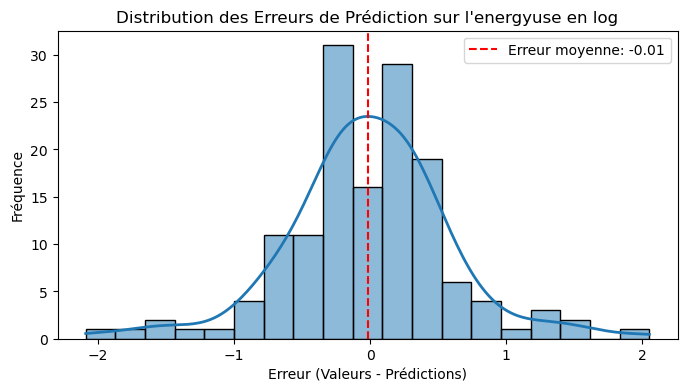

In [126]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

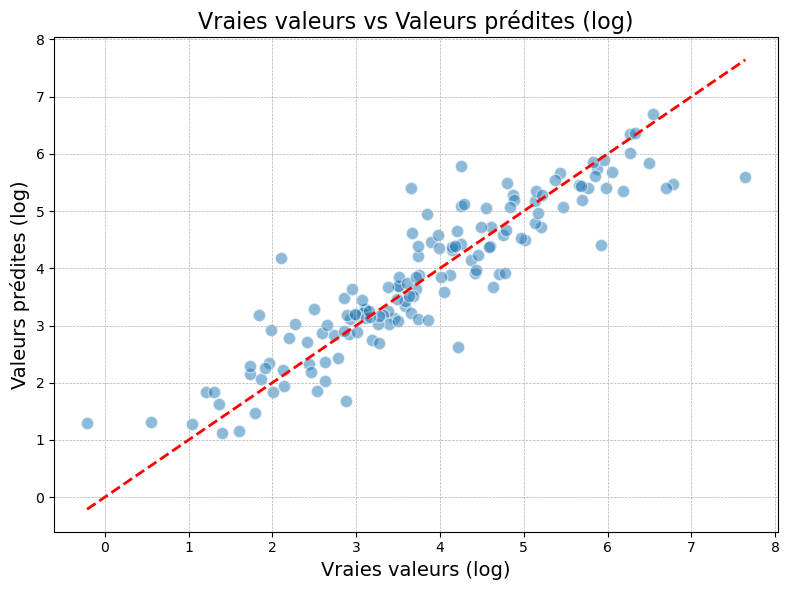

In [127]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


### Avec les valeurs réelles

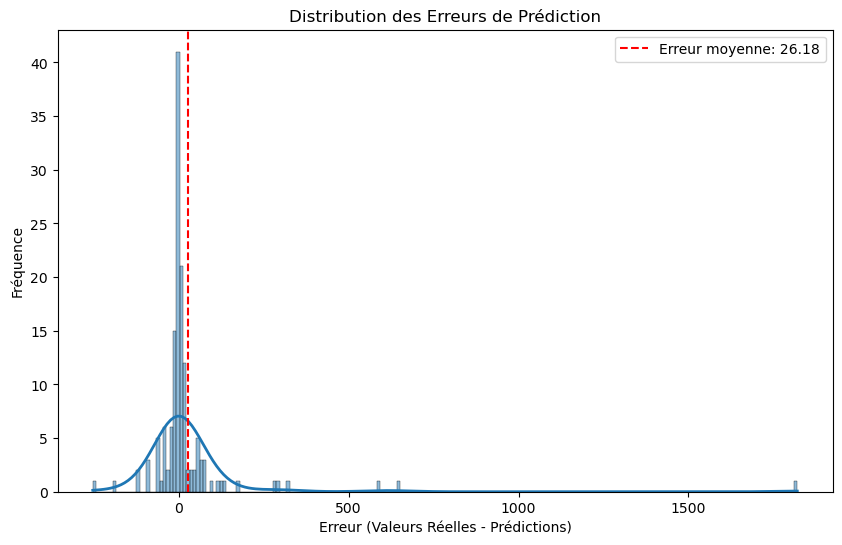

In [129]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

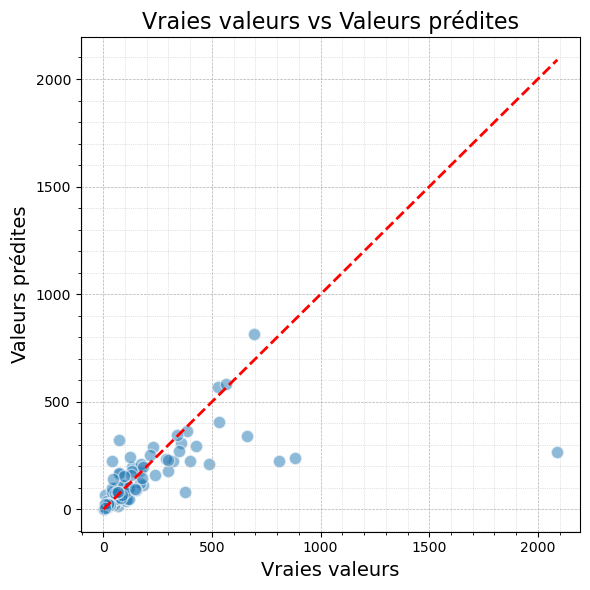

In [130]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [131]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

     Valeurs réelles  Valeurs prédites  Erreurs absolues
2            2089.28        268.682903       1820.597097
332           882.56        240.314204        642.245796
281           810.70        223.107205        587.592795
98            661.04        343.100586        317.939414
179           374.92         82.563354        292.356646
577           487.53        209.178473        278.351527
117            70.15        323.747533        253.597533
182            38.59        224.141186        185.551186
106           398.19        224.140660        174.049340
340           426.39        296.382601        130.007399
7             691.26        816.022557        124.762557
140           530.66        407.381477        123.278523
473           120.91        242.206047        121.296047
126           298.61        178.876331        119.733669
118           318.97        224.209699         94.760301


In [132]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,NumberOfPropertyUseTypes,SteamUse_pct,Electricity_pct,NaturalGas_pct,GFA_Residence,GFA_Loisir,GFA_Commerce,GFA_Services_public,GFA_Autres,GFA_Education_sup,GFA_Bureau,GFA_Educ_prim_sec,GFA_Entrepot,GFA_Grand_Bureau,GFA_Res_medic,GFA_Bureau_specialise,GFA_Restauration,GFA_Autres_services,GFA_Supermarche,GFA_Laboratoire,Log_TotalGHGEmissions,Log_SiteEnergyUseWN
2,1.0,41,196718,43.0,73937112.0,2089.28,47,1,29.168781,66.984851,2.020366,756493.0,0.0,0.000000,0.0,2899.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.644575,18.118725
332,1.0,76,319400,86.0,92537256.0,882.56,31,2,0.000000,94.527767,5.472233,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1680937.0,0.0,0.0,0.0,319368.0,0.0,0.0,6.782827,18.343122
281,1.0,6,0,79.0,75252304.0,810.70,104,3,0.000000,90.044480,8.464884,0.0,0.0,281296.000000,0.0,0.000000,0.0,0.0,0.0,220303.0,1000730.0,0.0,0.0,0.0,0.0,0.0,0.0,6.697898,18.136357
98,1.0,5,39000,1.0,28731502.0,661.04,89,2,0.000000,65.243512,34.756481,0.0,0.0,0.000000,0.0,0.000000,0.0,9805.0,0.0,0.0,0.0,0.0,146741.0,0.0,0.0,0.0,0.0,6.493814,17.173505
179,1.0,3,47656,7.0,11672252.0,374.92,15,1,0.000000,42.016254,54.964475,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,63199.0,0.0,0.0,0.0,0.0,0.0,0.0,5.926713,16.272725
577,1.0,5,0,77.0,28053172.0,487.53,7,3,0.000000,77.443143,22.556843,0.0,0.0,0.000000,0.0,15416.000000,0.0,0.0,0.0,0.0,329850.0,0.0,0.0,0.0,162894.0,0.0,0.0,6.189352,17.149612
117,1.0,22,0,98.0,10471812.0,70.15,87,3,0.000000,96.090677,0.000000,0.0,0.0,3291.899902,0.0,32041.100098,0.0,0.0,0.0,0.0,348969.0,0.0,0.0,0.0,0.0,0.0,0.0,4.250636,16.164198
182,1.0,5,0,93.0,5535626.0,38.59,33,4,0.000000,99.999982,0.000000,0.0,0.0,0.000000,0.0,0.000000,30177.0,0.0,0.0,0.0,91281.0,0.0,5931.0,0.0,0.0,0.0,0.0,3.652993,15.526715
106,1.0,10,0,93.0,40037736.0,398.19,91,2,0.052994,93.595531,6.351475,0.0,0.0,361107.000000,0.0,0.000000,0.0,332343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.986929,17.505333
340,1.0,29,0,43.0,37351804.0,426.39,46,4,0.000000,87.368851,10.025599,0.0,0.0,0.000000,0.0,52281.000000,0.0,0.0,0.0,0.0,371450.0,0.0,0.0,0.0,65451.0,0.0,0.0,6.055354,17.435892


# Comparaison et conclusion